<a href="https://colab.research.google.com/github/navyadua/Shopalytics/blob/main/Shopalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Web Scraping

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import random

In [ ]:
headers = {"user-agent":'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/97.0.4692.99 Safari/537.36/8mqMlPuL-96'}

name = input("Enter product name:")

url = 'https://www.flipkart.com/search?q=' + name + '&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off'

page = requests.get(url=url, headers=headers)
soup = BeautifulSoup(page.content,"html.parser")

links = []
n=0
review_list = []
star_list = []
name_list = []
price_list = []

for link in soup.find_all('a', class_='_2rpwl'):
  links.append('http://flipkart.com'+link.get('href'))

# initialize empty lists for product details and reviews
products_list = []
reviews_list = []


for url in links:

  print(url)

  page = requests.get(url=url, headers=headers)
  soup = BeautifulSoup(page.content,"html.parser")

  price = soup.find('div',class_ = "_30jeq3 _16Jk6d")
  price = int(((price.get_text()).strip()).replace("₹" , ""))

  name = soup.find('span',class_ = "B_NuCI")
  name = name.get_text()

  try:
    star = soup.find('div', class_='_3LWZlK _3uSWvT').text
  except AttributeError:
    star = ""

  # randomly generate a product ID for the current product
  product_id = random.randint(100000, 999999)

  products_list.append([product_id, name, price, star])

  # Find the link using the 'a' tag and the 'href' attribute
  #link = soup.find('div', {'class':'_3UAT2v _33R3aa'}).find('span', {'class': '_3at_-o'}).parent['href']
  try:
      review_link = 'http://flipkart.com' + soup.find('div', {'class':'_3UAT2v _33R3aa'}).parent['href']
      page = requests.get(url=review_link, headers=headers)
      soup = BeautifulSoup(page.content,"html.parser")
  except AttributeError:
      # Handle the exception here, for example, print an error message or return None
      print("Error: Link not found")
      review_link = None

  review_links = []
  reviews = soup.find_all('a', {'class':'ge-49M'})
  for i in reviews:
    review_links.append('http://flipkart.com'+i['href'])
  review_links

  for review_link in review_links:
    n += 1
    page = requests.get(url=review_link, headers=headers)
    soup = BeautifulSoup(page.content,"html.parser")
    # extract reviews and ratings from the soup object
    soup_reviews = soup.find_all('div', class_='_6K-7Co')
    soup_ratings = soup.find_all('div', class_='_3LWZlK _1BLPMq _3B8WaH')
    for review, rating in zip(soup_reviews, soup_ratings):
        # randomly generate a review ID for the current review
        review_id = "R" + str(random.randint(10000, 99999))
        # append the review and rating to the reviews list
        reviews_list.append([review_id, product_id, review.text, int(rating.text)])

Enter product name:blazer


In [ ]:
# create pandas DataFrames for product details and reviews
products_df = pd.DataFrame(products_list, columns=['product_id', 'name', 'price', 'star'])
reviews_df = pd.DataFrame(reviews_list, columns=['review_id', 'product_id', 'review', 'rating'])

## Reading Datasets

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/navyadua/Shopalytics/main/data/reviews.csv')
df

,review_id,product_id,review,rating
0,R78910,138347,"Really nice kurti.Cloth is comfortable, looks ...",5
1,R16029,138347,Lovely 😍️,5
2,R10862,138347,This Product is good ...i really like it...😍,4
3,R35315,138347,Awesome metrial,5
4,R24228,138347,Too good 🤩,5
...,...,...,...,...
2434,R78847,439222,Thin fabric,5
2435,R98968,439222,Good product,5
2436,R71278,439222,Good 😊,4
2437,R65694,439222,It's amazing V nice dress I love it Thank u,4


In [ ]:
df2 = pd.read_csv('https://raw.githubusercontent.com/navyadua/Shopalytics/main/data/products.csv')
df2

,product_id,name,price,star
0,934719,Women Bodycon Blue Dress,426,4.5
1,944790,Women Bodycon Purple Dress,433,4.5
2,138347,Women Maxi Maroon Dress,379,4.2
3,908900,Women Maxi Blue Dress,379,4.2
4,583347,Women A-line Purple Dress,499,NaN
5,796251,Women Fit and Flare Blue Dress,379,4.2
6,844750,Women Maxi Black Dress,379,4.2
7,855092,Women Bodycon Light Green Dress,449,4.5
8,530366,Women Fit and Flare Yellow Dress,399,4.3
9,641455,Women Fit and Flare Multicolor Dress,399,4.0


## Data Cleaning

In [ ]:
import re
def clean_reviews(text_list):
  cleaned_list=[]
  # Define a regular expression pattern that matches emojis and punctuation marks
  emoji_pattern = re.compile("[^\w\s,!?.]")
  # Remove emojis and punctuation marks from each string in the list
  cleaned_text = emoji_pattern.sub('', text_list)
  cleaned_list.append(cleaned_text)
  return cleaned_text

# Print the cleaned list
df['Cleaned Reviews'] = df['review'].apply(clean_reviews)
df

,review_id,product_id,review,rating,Cleaned Reviews
0,R78910,138347,"Really nice kurti.Cloth is comfortable, looks ...",5,"Really nice kurti.Cloth is comfortable, looks ..."
1,R16029,138347,Lovely 😍️,5,Lovely
2,R10862,138347,This Product is good ...i really like it...😍,4,This Product is good ...i really like it...
3,R35315,138347,Awesome metrial,5,Awesome metrial
4,R24228,138347,Too good 🤩,5,Too good
...,...,...,...,...,...
2434,R78847,439222,Thin fabric,5,Thin fabric
2435,R98968,439222,Good product,5,Good product
2436,R71278,439222,Good 😊,4,Good
2437,R65694,439222,It's amazing V nice dress I love it Thank u,4,Its amazing V nice dress I love it Thank u


## Sentimental Analysis

In [ ]:
!pip install nltk
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
def get_sentiment(review):
    analyzer = SentimentIntensityAnalyzer()
    score = analyzer.polarity_scores(review)['compound']
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"

df['sentiment'] = df['Cleaned Reviews'].apply(get_sentiment)
df

,review_id,product_id,review,rating,Cleaned Reviews,sentiment
0,R78910,138347,"Really nice kurti.Cloth is comfortable, looks ...",5,"Really nice kurti.Cloth is comfortable, looks ...",positive
1,R16029,138347,Lovely 😍️,5,Lovely,positive
2,R10862,138347,This Product is good ...i really like it...😍,4,This Product is good ...i really like it...,positive
3,R35315,138347,Awesome metrial,5,Awesome metrial,positive
4,R24228,138347,Too good 🤩,5,Too good,positive
...,...,...,...,...,...,...
2434,R78847,439222,Thin fabric,5,Thin fabric,neutral
2435,R98968,439222,Good product,5,Good product,positive
2436,R71278,439222,Good 😊,4,Good,positive
2437,R65694,439222,It's amazing V nice dress I love it Thank u,4,Its amazing V nice dress I love it Thank u,positive


The reason for using this threshold is to reduce the number of false positives, or reviews that are mistakenly classified as positive when they are actually neutral or negative. By setting a higher threshold for positive sentiment, the code may be more conservative in its classification of reviews.

In [ ]:
df['sentiment'].value_counts()

positive    2147
neutral      243
negative      49
Name: sentiment, dtype: int64

In [ ]:
df[df['sentiment'] == 'positive'].head()

,review_id,product_id,review,rating,Cleaned Reviews,sentiment
0,R78910,138347,"Really nice kurti.Cloth is comfortable, looks ...",5,"Really nice kurti.Cloth is comfortable, looks ...",positive
1,R16029,138347,Lovely 😍️,5,Lovely,positive
2,R10862,138347,This Product is good ...i really like it...😍,4,This Product is good ...i really like it...,positive
3,R35315,138347,Awesome metrial,5,Awesome metrial,positive
4,R24228,138347,Too good 🤩,5,Too good,positive


In [ ]:
df[df['sentiment'] == 'neutral'].head()

,review_id,product_id,review,rating,Cleaned Reviews,sentiment
15,R26266,138347,Wonderfull,5,Wonderfull,neutral
16,R26195,138347,Awsm product❤❤❤❤I'm so...Happy🤗🤗🤗🤗,5,Awsm productIm so...Happy,neutral
18,R43148,138347,"Nic dress,good fitting 🥰...",4,"Nic dress,good fitting ...",neutral
28,R37207,138347,Osm kurti,5,Osm kurti,neutral
34,R67931,138347,Osm kurti...,5,Osm kurti...,neutral


In [ ]:
df[df['sentiment'] == 'negative'].tail()

,review_id,product_id,review,rating,Cleaned Reviews,sentiment
2030,R61365,204682,Material isn't cotton . Feels itchy and uncomf...,4,Material isnt cotton . Feels itchy and uncomfo...,negative
2037,R66496,204682,Poor quality fabric,5,Poor quality fabric,negative
2092,R76577,380831,"Good quality ,best service but size S is also...",4,"Good quality ,best service but size S is also...",negative
2129,R14262,380831,Good but no mask..go for it❤️,4,Good but no mask..go for it,negative
2412,R58504,439222,Too loose dosent fit nicely its net working on...,5,Too loose dosent fit nicely its net working on...,negative




```
Sometimes , negative ratings are getting 5 star ratings as seen in index 2412 and 2037
So now we have to adjust the rating , so as to get the actual rating of the product
```



## Working on Ratings



```
Here, we have given a new rating to the product based on the sentiment.
```



In [ ]:
# define the mapping
mapping = {'positive': 5, 'neutral': 3, 'negative': 1}

# replace the values in the 'sentiment' column
df['rating_2'] = df['sentiment'].replace(mapping)

# print the updated dataframe
df

,review_id,product_id,review,rating,Cleaned Reviews,sentiment,rating_2
0,R78910,138347,"Really nice kurti.Cloth is comfortable, looks ...",5,"Really nice kurti.Cloth is comfortable, looks ...",positive,5
1,R16029,138347,Lovely 😍️,5,Lovely,positive,5
2,R10862,138347,This Product is good ...i really like it...😍,4,This Product is good ...i really like it...,positive,5
3,R35315,138347,Awesome metrial,5,Awesome metrial,positive,5
4,R24228,138347,Too good 🤩,5,Too good,positive,5
...,...,...,...,...,...,...,...
2434,R78847,439222,Thin fabric,5,Thin fabric,neutral,3
2435,R98968,439222,Good product,5,Good product,positive,5
2436,R71278,439222,Good 😊,4,Good,positive,5
2437,R65694,439222,It's amazing V nice dress I love it Thank u,4,Its amazing V nice dress I love it Thank u,positive,5




```
Then we took out the mean of the ratings grouped by product_id.
The rating obtained is the adjusted rating
```



In [ ]:
# calculate the mean rating for each product in reviews_df
mean_ratings_df = df.groupby('product_id')['rating_2'].mean().reset_index()

# select the rows in products_df that have a matching 'product_id' in reviews_df
selected_df = df2[df2['product_id'].isin(mean_ratings_df['product_id'])]

# merge the mean_ratings_df with selected_df on 'product_id'
merged_df = pd.merge(mean_ratings_df, selected_df, on='product_id')

# compare the mean rating with the star rating for each product
comparison_df = pd.DataFrame({
    'product_id': merged_df['product_id'],
    'mean_rating': merged_df['rating_2'],
    'star_rating': merged_df['star'],
    'rating_matches': merged_df['rating_2'] == merged_df['star']
})

# print the comparison dataframe
comparison_df


,product_id,mean_rating,star_rating,rating_matches
0,138347,4.780000,4.2,False
1,192619,4.521739,4.1,False
2,204682,4.384615,3.9,False
3,207044,4.800000,4.1,False
4,210524,4.711340,4.2,False
5,263598,4.541667,4.0,False
6,283909,4.780000,4.0,False
7,380831,4.700000,4.3,False
8,438421,4.800000,4.1,False
9,439222,4.731959,4.3,False


In [ ]:
mean_ratings_df

,product_id,rating_2
0,138347,4.780000
1,192619,4.521739
2,204682,4.384615
3,207044,4.800000
4,210524,4.711340
5,263598,4.541667
6,283909,4.780000
7,380831,4.700000
8,438421,4.800000
9,439222,4.731959


In [ ]:
selected_df

,product_id,name,price,star
2,138347,Women Maxi Maroon Dress,379,4.2
3,908900,Women Maxi Blue Dress,379,4.2
5,796251,Women Fit and Flare Blue Dress,379,4.2
6,844750,Women Maxi Black Dress,379,4.2
8,530366,Women Fit and Flare Yellow Dress,399,4.3
9,641455,Women Fit and Flare Multicolor Dress,399,4.0
10,876242,Women A-line Multicolor Dress,206,3.9
12,283909,Women Fit and Flare Multicolor Dress,399,4.0
13,210524,Women Fit and Flare Black Dress,379,4.2
14,958738,Women Ethnic Dress Black Dress,379,4.2


In [ ]:
df

,review_id,product_id,review,rating,Cleaned Reviews,sentiment,rating_2
0,R78910,138347,"Really nice kurti.Cloth is comfortable, looks ...",5,"Really nice kurti.Cloth is comfortable, looks ...",positive,5
1,R16029,138347,Lovely 😍️,5,Lovely,positive,5
2,R10862,138347,This Product is good ...i really like it...😍,4,This Product is good ...i really like it...,positive,5
3,R35315,138347,Awesome metrial,5,Awesome metrial,positive,5
4,R24228,138347,Too good 🤩,5,Too good,positive,5
...,...,...,...,...,...,...,...
2434,R78847,439222,Thin fabric,5,Thin fabric,neutral,3
2435,R98968,439222,Good product,5,Good product,positive,5
2436,R71278,439222,Good 😊,4,Good,positive,5
2437,R65694,439222,It's amazing V nice dress I love it Thank u,4,Its amazing V nice dress I love it Thank u,positive,5


In [ ]:
df_new = df[['Cleaned Reviews','rating_2']]
df_new

,Cleaned Reviews,rating_2
0,"Really nice kurti.Cloth is comfortable, looks ...",5
1,Lovely,5
2,This Product is good ...i really like it...,5
3,Awesome metrial,5
4,Too good,5
...,...,...
2434,Thin fabric,3
2435,Good product,5
2436,Good,5
2437,Its amazing V nice dress I love it Thank u,5


## Finding Similar Products

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Preprocess product names
corpus = [name.lower() for name in df2['name']]
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(corpus)

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix)

# Print the cosine similarity matrix
print(cosine_sim)

[[1.         0.47549527 0.11641924 ... 0.12714362 0.47549527 0.08986249]
 [0.47549527 1.         0.1096302  ... 0.11972919 0.44776657 0.08462212]
 [0.11641924 0.1096302  1.         ... 0.11451399 0.1096302  0.08093613]
 ...
 [0.12714362 0.11972919 0.11451399 ... 1.         0.11972919 0.08839185]
 [0.47549527 0.44776657 0.1096302  ... 0.11972919 1.         0.08462212]
 [0.08986249 0.08462212 0.08093613 ... 0.08839185 0.08462212 1.        ]]


<Axes: >

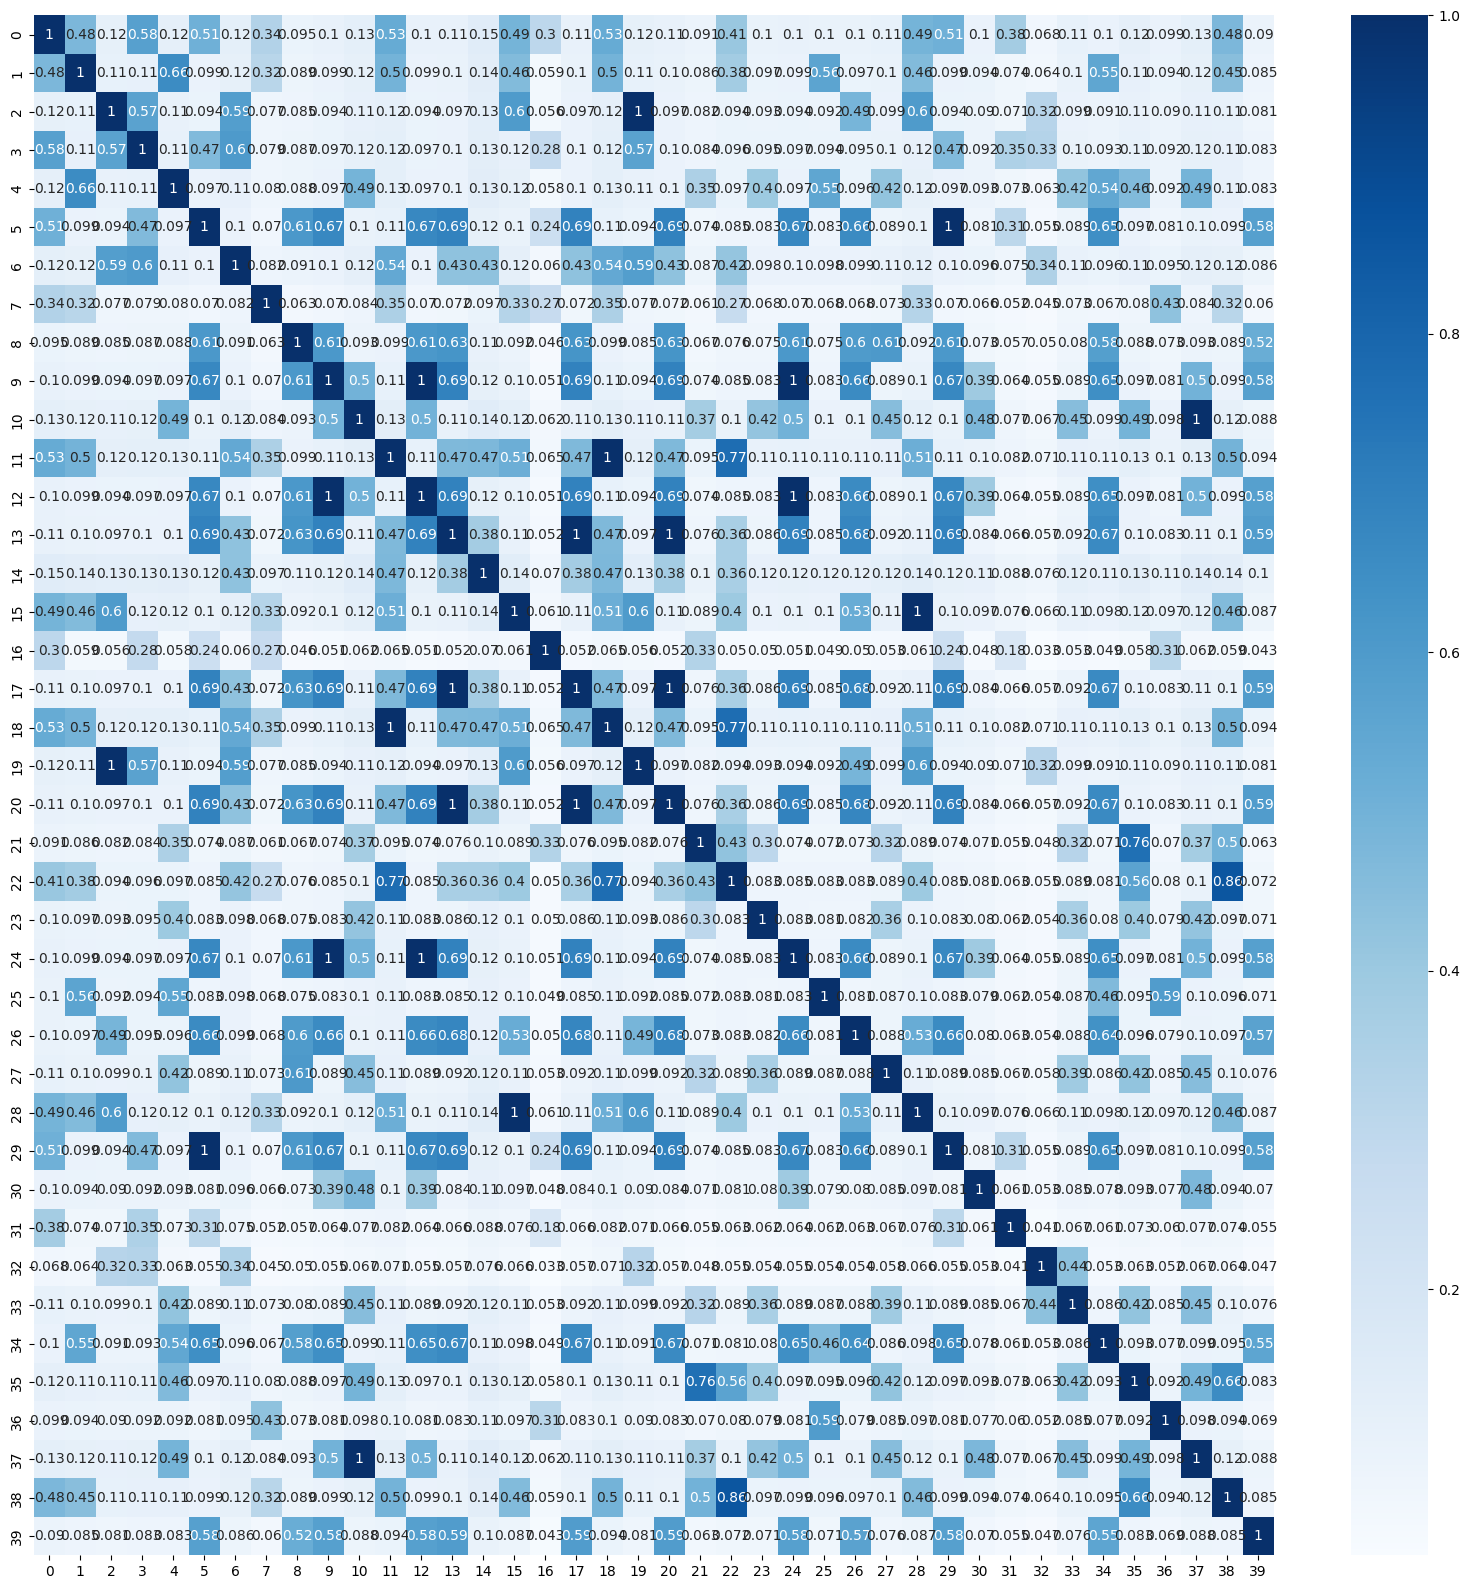

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 20))
sns.heatmap(cosine_sim, annot=True, cmap='Blues')

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Preprocess the data by dropping irrelevant columns
preprocessed_data = df2.drop(['product_id', 'name', 'price'], axis=1)

# Fill missing values with the mean of the column
preprocessed_data = preprocessed_data.fillna(preprocessed_data.mean())

# Calculate pairwise cosine similarity using the preprocessed data
cos_sim = cosine_similarity(preprocessed_data)

# Create a dictionary to map similar products
similar_products = {}

# Loop through each item in the dataset
for i in range(len(df2)):
    # Get the product ID and name
    product_id = df2.iloc[i]['product_id']
    product_name = df2.iloc[i]['name']

    # Find the indices and similarity scores of the most similar products
    similar_indices = cos_sim[i].argsort()[:-6:-1]
    similar_scores = [cos_sim[i][j] for j in similar_indices]

    # Map the product ID and name to its most similar products
    similar_products[(product_id, product_name)] = [(df2.iloc[similar_indices[j]]['product_id'],
                                                     df2.iloc[similar_indices[j]]['name'],
                                                     similar_scores[j]) for j in range(1, len(similar_indices))]

# Print the similar products for each item in the dataset
for product, similar in similar_products.items():
    print(f"Similar products for '{product[1]}' (Product ID: {product[0]}):")
    for s in similar:
        print(f"\t'{s[1]}' (Product ID: {s[0]}) with similarity score of {s[2]:.2f}")


Similar products for 'Women Bodycon Blue Dress' (Product ID: 934719):
	'Women Bodycon Pink Dress' (Product ID: 439222) with similarity score of 1.00
	'Women Fit and Flare Black Dress' (Product ID: 873898) with similarity score of 1.00
	'Women Co-ords Green, Blue, White Dress' (Product ID: 192619) with similarity score of 1.00
	'Women Bodycon Maroon Dress' (Product ID: 481165) with similarity score of 1.00
Similar products for 'Women Bodycon Purple Dress' (Product ID: 944790):
	'Women Bodycon Pink Dress' (Product ID: 439222) with similarity score of 1.00
	'Women Fit and Flare Black Dress' (Product ID: 873898) with similarity score of 1.00
	'Women Co-ords Green, Blue, White Dress' (Product ID: 192619) with similarity score of 1.00
	'Women Bodycon Maroon Dress' (Product ID: 481165) with similarity score of 1.00
Similar products for 'Women Maxi Maroon Dress' (Product ID: 138347):
	'Women Bodycon Pink Dress' (Product ID: 439222) with similarity score of 1.00
	'Women Fit and Flare Black Dres

## Fake Detection

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from nltk.sentiment import SentimentIntensityAnalyzer

# Load the reviews dataset
reviews = df

# Instantiate the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to compute the sentiment score of a review
def get_sentiment_score(text):
    return sia.polarity_scores(text)['compound']

# Compute the sentiment score for each review
reviews['sentiment_score'] = reviews['review'].apply(get_sentiment_score)

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Vectorize the reviews text
X = vectorizer.fit_transform(reviews['review'])

# Add the star rating and sentiment score as features
X = np.hstack([X.toarray(), reviews['rating'].values.reshape(-1, 1), reviews['sentiment_score'].values.reshape(-1, 1)])

# Initialize the K-means model
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the K-means model on the data
kmeans.fit(X)

# Get the predicted cluster labels
pred_labels = kmeans.labels_

# Map the predicted labels to binary values (0 or 1)
label_map = np.where(pred_labels == 0, 1, 0)

# Add the predicted labels to the reviews dataset
reviews['is_fake'] = label_map

# Store the final dataset in a new DataFrame called 'final'
final = reviews[['review', 'rating', 'sentiment_score', 'is_fake']]
reviews.to_csv("final.csv", index=False)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
final

,review,rating,sentiment_score,is_fake
0,"Really nice kurti.Cloth is comfortable, looks ...",5,0.8777,1
1,Lovely 😍️,5,0.5859,1
2,This Product is good ...i really like it...😍,4,0.6901,0
3,Awesome metrial,5,0.6249,1
4,Too good 🤩,5,0.4404,1
...,...,...,...,...
2434,Thin fabric,5,0.0000,1
2435,Good product,5,0.4404,1
2436,Good 😊,4,0.4404,0
2437,It's amazing V nice dress I love it Thank u,4,0.9231,0


In [ ]:
final['is_fake'].value_counts()

1    1786
0     653
Name: is_fake, dtype: int64

With the current review score it shows accuracy of true reviews as only 26%.

**Testing**

In [ ]:
range_n_clusters = [2,3,4,5]

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn import metrics
import pandas as pd

In [ ]:
s = []
c = []
d = []

range_n_clusters = [2,3,4,5]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=990)
    cluster_labels = clusterer.fit_predict(X)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    s.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
print()
print()

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=990)
    cluster_labels = clusterer.fit_predict(X)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    calinski_harabaz_sc = metrics.calinski_harabasz_score(X, cluster_labels)
    c.append(calinski_harabaz_sc)
    print("For n_clusters =", n_clusters,
          "The average calinski_harabaz_score is :", calinski_harabaz_sc)
print()
print()

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=990)
    cluster_labels = clusterer.fit_predict(X)
    #Here the minimum score is zero, with lower values indicating better clustering.
    davies_bouldin_score = metrics.davies_bouldin_score(X, cluster_labels)
    d.append(davies_bouldin_score)
    print("For n_clusters =", n_clusters,
          "The average davies_bouldin_score is :", davies_bouldin_score)
print()
print()


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.23138345848521846


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.09066377737228223


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.10936407585758968


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.11362373140921245




/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average calinski_harabaz_score is : 646.1549352426028


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average calinski_harabaz_score is : 421.28095029213557


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average calinski_harabaz_score is : 335.976074543994


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average calinski_harabaz_score is : 291.4515469885344




/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average davies_bouldin_score is : 1.732043917621824


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average davies_bouldin_score is : 1.8927499943012318


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average davies_bouldin_score is : 2.39570201769236


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average davies_bouldin_score is : 2.3555898570425677




In [ ]:
score = pd.DataFrame({'silhouette_score' : s ,'calinski_harabaz_score' : c  , 'davies_bouldin_score' : d} , index = range_n_clusters)
score

,silhouette_score,calinski_harabaz_score,davies_bouldin_score
2,0.231383,646.154935,1.732044
3,0.090664,421.280950,1.892750
4,0.109364,335.976075,2.395702
5,0.113624,291.451547,2.355590


<Axes: >

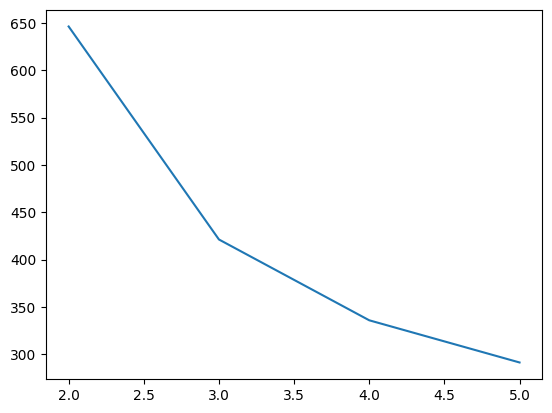

In [ ]:
score['calinski_harabaz_score'].plot()

<Axes: >

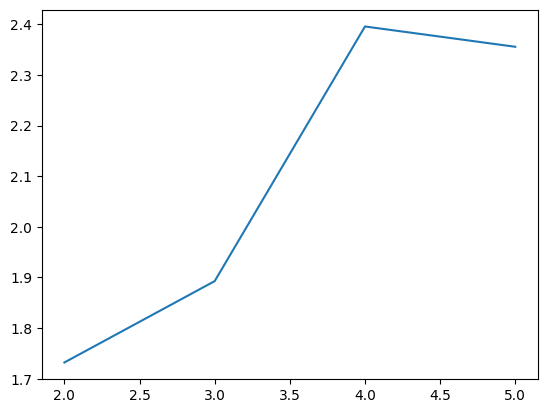

In [ ]:
score['davies_bouldin_score'].plot()

In the given results, k=2 has the highest Silhouette score and Calinski-Harabasz score, and the lowest Davies-Bouldin score, suggesting that it may be the best choice among the options provided.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from nltk.sentiment import SentimentIntensityAnalyzer

# Load the reviews dataset
reviews = df_new

# Instantiate the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to compute the sentiment score of a review
def get_sentiment_score(text):
    return sia.polarity_scores(text)['compound']

# Compute the sentiment score for each review
reviews['sentiment_score'] = reviews['Cleaned Reviews'].apply(get_sentiment_score)

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Vectorize the reviews text
X = vectorizer.fit_transform(reviews['Cleaned Reviews'])

# Add the star rating and sentiment score as features
X = np.hstack([X.toarray(), reviews['rating_2'].values.reshape(-1, 1), reviews['sentiment_score'].values.reshape(-1, 1)])

# Initialize the K-means model
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the K-means model on the data
kmeans.fit(X)

# Get the predicted cluster labels
pred_labels = kmeans.labels_

# Map the predicted labels to binary values (0 or 1)
label_map = np.where(pred_labels == 0, 1, 0)

# Add the predicted labels to the reviews dataset
reviews['is_fake'] = label_map

# Store the final dataset in a new DataFrame called 'final'
final = reviews[['Cleaned Reviews', 'rating_2', 'sentiment_score', 'is_fake']]
reviews.to_csv("final.csv", index=False)

<ipython-input-28-253e50460549>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['sentiment_score'] = reviews['Cleaned Reviews'].apply(get_sentiment_score)
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-28-253e50460549>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['is_fake'] = label_map


In [ ]:
from sklearn.metrics import silhouette_score

# Compute the Silhouette Coefficient for the K-means model
silhouette_score = silhouette_score(X, kmeans.labels_, metric='euclidean')

# Print the Silhouette Coefficient
print(f"Silhouette Coefficient: {silhouette_score:.3f}")

Silhouette Coefficient: 0.504


Therefore, a Silhouette score of 0.504 is a moderate to good score, indicating that the clustering results are reasonable

In [ ]:
final

,Cleaned Reviews,rating_2,sentiment_score,is_fake
0,"Really nice kurti.Cloth is comfortable, looks ...",5,0.8777,0
1,Lovely,5,0.5859,0
2,This Product is good ...i really like it...,5,0.6901,0
3,Awesome metrial,5,0.6249,0
4,Too good,5,0.4404,0
...,...,...,...,...
2434,Thin fabric,3,0.0000,1
2435,Good product,5,0.4404,0
2436,Good,5,0.4404,0
2437,Its amazing V nice dress I love it Thank u,5,0.9231,0


In [ ]:
final['is_fake'].value_counts()

0    2147
1     292
Name: is_fake, dtype: int64

It shows the number of fake reviews is only 292 from 2439.
The new model shows 88.02% accuracy.

Elbow Chart

<ipython-input-25-e845ed4f757b>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['sentiment_score'] = reviews['Cleaned Reviews'].apply(get_sentiment_score)
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change

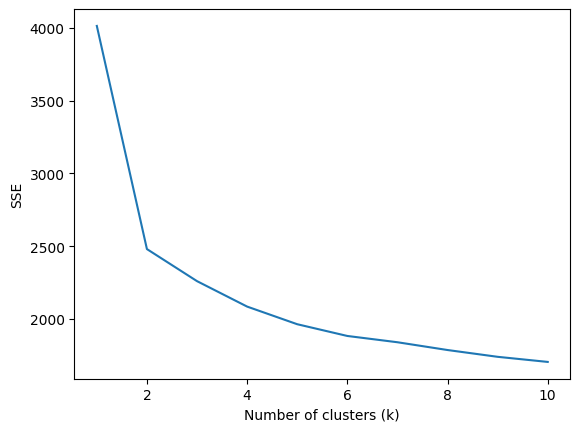

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-25-e845ed4f757b>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['is_fake'] = label_map


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Load the reviews dataset
reviews = df_new

# Instantiate the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to compute the sentiment score of a review
def get_sentiment_score(text):
    return sia.polarity_scores(text)['compound']

# Compute the sentiment score for each review
reviews['sentiment_score'] = reviews['Cleaned Reviews'].apply(get_sentiment_score)

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Vectorize the reviews text
X = vectorizer.fit_transform(reviews['Cleaned Reviews'])

# Add the star rating and sentiment score as features
X = np.hstack([X.toarray(), reviews['rating_2'].values.reshape(-1, 1), reviews['sentiment_score'].values.reshape(-1, 1)])

# Perform the elbow method to find the optimal value of k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 11), sse)
plt.xlabel("Number of clusters (k)")
plt.ylabel("SSE")
plt.show()

# Initialize the K-means model with the optimized value of k
k = 3 # Set the value of k based on the elbow method
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the K-means model on the data
kmeans.fit(X)

# Get the predicted cluster labels
pred_labels = kmeans.labels_

# Map the predicted labels to binary values (0 or 1)
label_map = np.where(pred_labels == 0, 1, 0)

# Add the predicted labels to the reviews dataset
reviews['is_fake'] = label_map

# Store the final dataset in a new DataFrame called 'final'
final = reviews[['Cleaned Reviews', 'rating_2', 'sentiment_score', 'is_fake']]
reviews.to_csv("final.csv", index=False)


In [ ]:
from sklearn.metrics import silhouette_score

# Compute the Silhouette Coefficient for the K-means model
silhouette_score = silhouette_score(X, kmeans.labels_, metric='euclidean')

# Print the Silhouette Coefficient
print(f"Silhouette Coefficient: {silhouette_score:.3f}")


Silhouette Coefficient: 0.140
